# Generalized Shallow Water Equations

In [66]:
load('GeneralizedShallowWaterVariables.sage')

LegendrePolynomials.sage tests passed


## One Dimension

### Zeroth Order/Constant System/Shallow Water Equations

In [2]:
set_generalized_shallow_water_variables(0)
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
print(eigenvalues)
print(R)
print(L)

[u - sqrt(g*h), u + sqrt(g*h)]
[            1             1]
[u - sqrt(g*h) u + sqrt(g*h)]
[ 1/2*(u + sqrt(g*h))/sqrt(g*h)                 -1/2/sqrt(g*h)]
[-1/2*(u - sqrt(g*h))/sqrt(g*h)                  1/2/sqrt(g*h)]


In [85]:
(L[0, 0] - 1/2 * u / sqrt(g * h) - 1/2).simplify_full()

0

In [64]:
(L * R).simplify_full()


[1 0]
[0 1]

In [28]:
grad_lambda_0 = vector([eigenvalues[0].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(2)])
grad_lambda_1 = vector([eigenvalues[1].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(2)])
print(grad_lambda_0.dot_product(eigenvectors[0][0]).full_simplify())
print(grad_lambda_1.dot_product(eigenvectors[1][0]).full_simplify())

-3/2*g/sqrt(g*h)
3/2*g/sqrt(g*h)


### First Order/Linear System

In [29]:
set_generalized_shallow_water_variables(1)
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvalues.sort()
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T.simplify_full()
G = PermutationGroup([(2, 3)])
R.permute_columns(G.gens()[0])
L = R.inverse().simplify_full()
print(eigenvalues)
print("R")
print(R)
print("L")
print(L)

[u - sqrt(g*h + s^2), u, u + sqrt(g*h + s^2)]
R
[                   1                    1                    1]
[ u - sqrt(g*h + s^2)                    u  u + sqrt(g*h + s^2)]
[                 2*s -1/2*(3*g*h - s^2)/s                  2*s]
L
[                     1/6*(3*g*h - s^2 + 3*sqrt(g*h + s^2)*u)/(g*h + s^2)                                                     -1/2/sqrt(g*h + s^2)                                                        1/3*s/(g*h + s^2)]
[                                                     4/3*s^2/(g*h + s^2)                                                                        0                                                       -2/3*s/(g*h + s^2)]
[-1/6*(3*(g*h + s^2)*u - (3*g*h - s^2)*sqrt(g*h + s^2))/(g*h + s^2)^(3/2)                                                      1/2/sqrt(g*h + s^2)                                                        1/3*s/(g*h + s^2)]


In [17]:
(L * R).simplify_full()

[1 0 0]
[0 1 0]
[0 0 1]

In [30]:
grad_lambda_0 = vector([eigenvalues[0].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
grad_lambda_1 = vector([eigenvalues[1].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
grad_lambda_2 = vector([eigenvalues[2].subs(p_to_q).diff(q[i]).subs(q_to_p) for i in range(3)])
print(grad_lambda_0.dot_product(eigenvectors[0][0]).full_simplify())
print(grad_lambda_1.dot_product(eigenvectors[1][0]).full_simplify())
print(grad_lambda_2.dot_product(eigenvectors[2][0]).full_simplify())

-1/2*(3*g*h + 4*s^2)*sqrt(g*h + s^2)/(g*h^2 + h*s^2)
sqrt(g*h + s^2)/h
-1/2*(2*g*h + s^2)*sqrt(g*h + s^2)/(g*h^2 + h*s^2)


In [40]:
grad_lambda_0[2]

-s/(sqrt(g*h + s^2)*h)

### Second Order/Quadratic

In [17]:
set_generalized_shallow_water_variables(2)
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
print(eigenvalues)
print(eigenvectors)

[5/14*k + u - 1/210*sqrt(15)*sqrt((8575*g^2*h^2 + 11340*g*h*k^2 + 20412*k^4 + 32928*s^4 + 84*(490*g*h - 243*k^2)*s^2 + (-42875*g^3*h^3 + 103950*g^2*h^2*k^2 + 131220*g*h*k^4 + 157464*k^6 + 296352*s^6 + 504*(980*g*h + 27*k^2)*s^4 + 18*(8575*g^2*h^2 - 85050*g*h*k^2 - 34992*k^4)*s^2 + 90*sqrt(-6002500/3*g^5*h^5*k^2 - 2866500*g^4*h^4*k^4 - 3110400*g^3*h^3*k^6 - 524880*g^2*h^2*k^8 - 30118144/15*s^12 - 307328/5*(196*g*h - 405*k^2)*s^10 - 784/15*(552230*g^2*h^2 + 1222452*g*h*k^2 + 1622025*k^4)*s^8 - 8/15*(64706950*g^3*h^3 + 303714495*g^2*h^2*k^2 + 251547282*g*h*k^4 - 78928830*k^6)*s^6 - 1/5*(102942875*g^4*h^4 + 289560600*g^3*h^3*k^2 - 1220229360*g^2*h^2*k^4 - 1366017696*g*h*k^6 - 127545840*k^8)*s^4 - 1/15*(73530625*g^5*h^5 - 197182125*g^4*h^4*k^2 + 669173400*g^3*h^3*k^4 + 1046873160*g^2*h^2*k^6 + 1323642384*g*h*k^8 + 229582512*k^10)*s^2))^(1/3)*(490*g*h + 459*k^2 + 588*s^2) + 7*(-42875*g^3*h^3 + 103950*g^2*h^2*k^2 + 131220*g*h*k^4 + 157464*k^6 + 296352*s^6 + 504*(980*g*h + 27*k^2)*s^4 + 18*(85

# 2 Dimensions

### Zeroeth Order/Constant Moment/Shallow Water Equations

In [70]:
set_generalized_shallow_water_variables_2d(0)

B
C
D
f
s


NameError: name 'f_x' is not defined

In [ ]:
eig = A_p.eigenvectors_right()
eigenvalues = [e[0].simplify_full() for e in eig]
eigenvectors = [[ev.simplify_full() for ev in e[1]] for e in eig]
R = matrix([ev[0] for ev in eigenvectors]).T
L = R.inverse().simplify_full()
print(eigenvalues)
print(R)
print(L)

In [43]:
maxima('plotdf([u, -u + 2*v],[u,v],[u,-2,2],[v,-2,2])')

"/Users/caleblogemann/.sage/temp/Calebs-MacBook-Pro-3.local/69695/ecl/maxout65756.xmaxima"

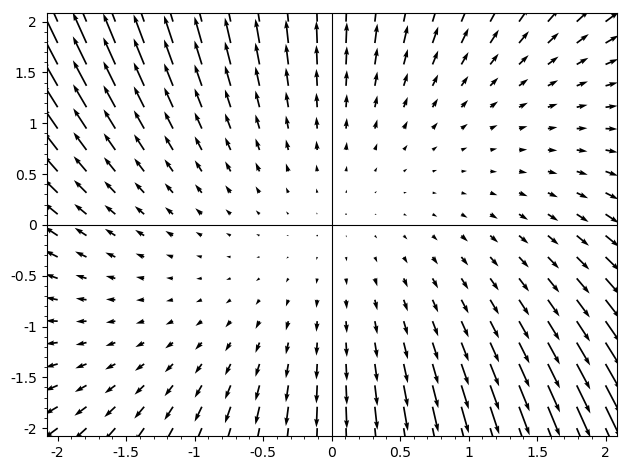

In [44]:
plot_vector_field([u, -u + 2*v], [u, -2, 2], [v, -2, 2])

In [45]:
test = matrix([[1, 0], [-1, 2]])

In [49]:
test.eigenvectors_right()

[(2, [
  (0, 1)
  ], 1), (1, [
  (1, 1)
  ], 1)]